In [25]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from variable_names import to_keep
import missingno as msno



# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
# source https://github.com/dhaitz/matplotlib-stylesheets



# Feel free to add all the libraries you need


In [26]:
df = pd.read_csv('data/Train.csv')

In [27]:
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
list(df.columns)

['Place_ID X Date',
 'Date',
 'Place_ID',
 'target',
 'target_min',
 'target_max',
 'target_variance',
 'target_count',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO

In [29]:
df = df[to_keep]

In [30]:
df.head()

,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_tropospheric_NO2_column_number_density,...,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_absorbing_aerosol_index
0,2020-01-02,010Q650,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000017,...,0.000064,0.566828,NaN,NaN,0.000000,NaN,-1.231330,-0.000127,0.312521,-1.861476
1,2020-01-03,010Q650,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000021,...,0.000171,0.858446,99353.672374,0.315403,0.059358,5.958538,-1.082553,0.000150,0.433957,-1.452612
2,2020-01-04,010Q650,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000007,...,0.000124,0.910536,95671.383578,0.307463,0.082247,5.755760,-1.001241,0.000150,0.356925,-1.572950
3,2020-01-05,010Q650,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000023,...,0.000081,1.132571,96232.486418,0.279637,0.121555,6.246885,-0.777023,0.000227,0.584522,-1.239317
4,2020-01-06,010Q650,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000009,...,0.000140,0.649359,52561.523079,0.238241,0.037008,4.205691,0.366324,0.000390,0.408047,0.202489


In [31]:
df[['Date','Place_ID']].duplicated().value_counts()

False    30557
dtype: int64

In [32]:
### Which columns have at least one Nan?
nan_cols = df.columns[df.isna().any(axis=0)]

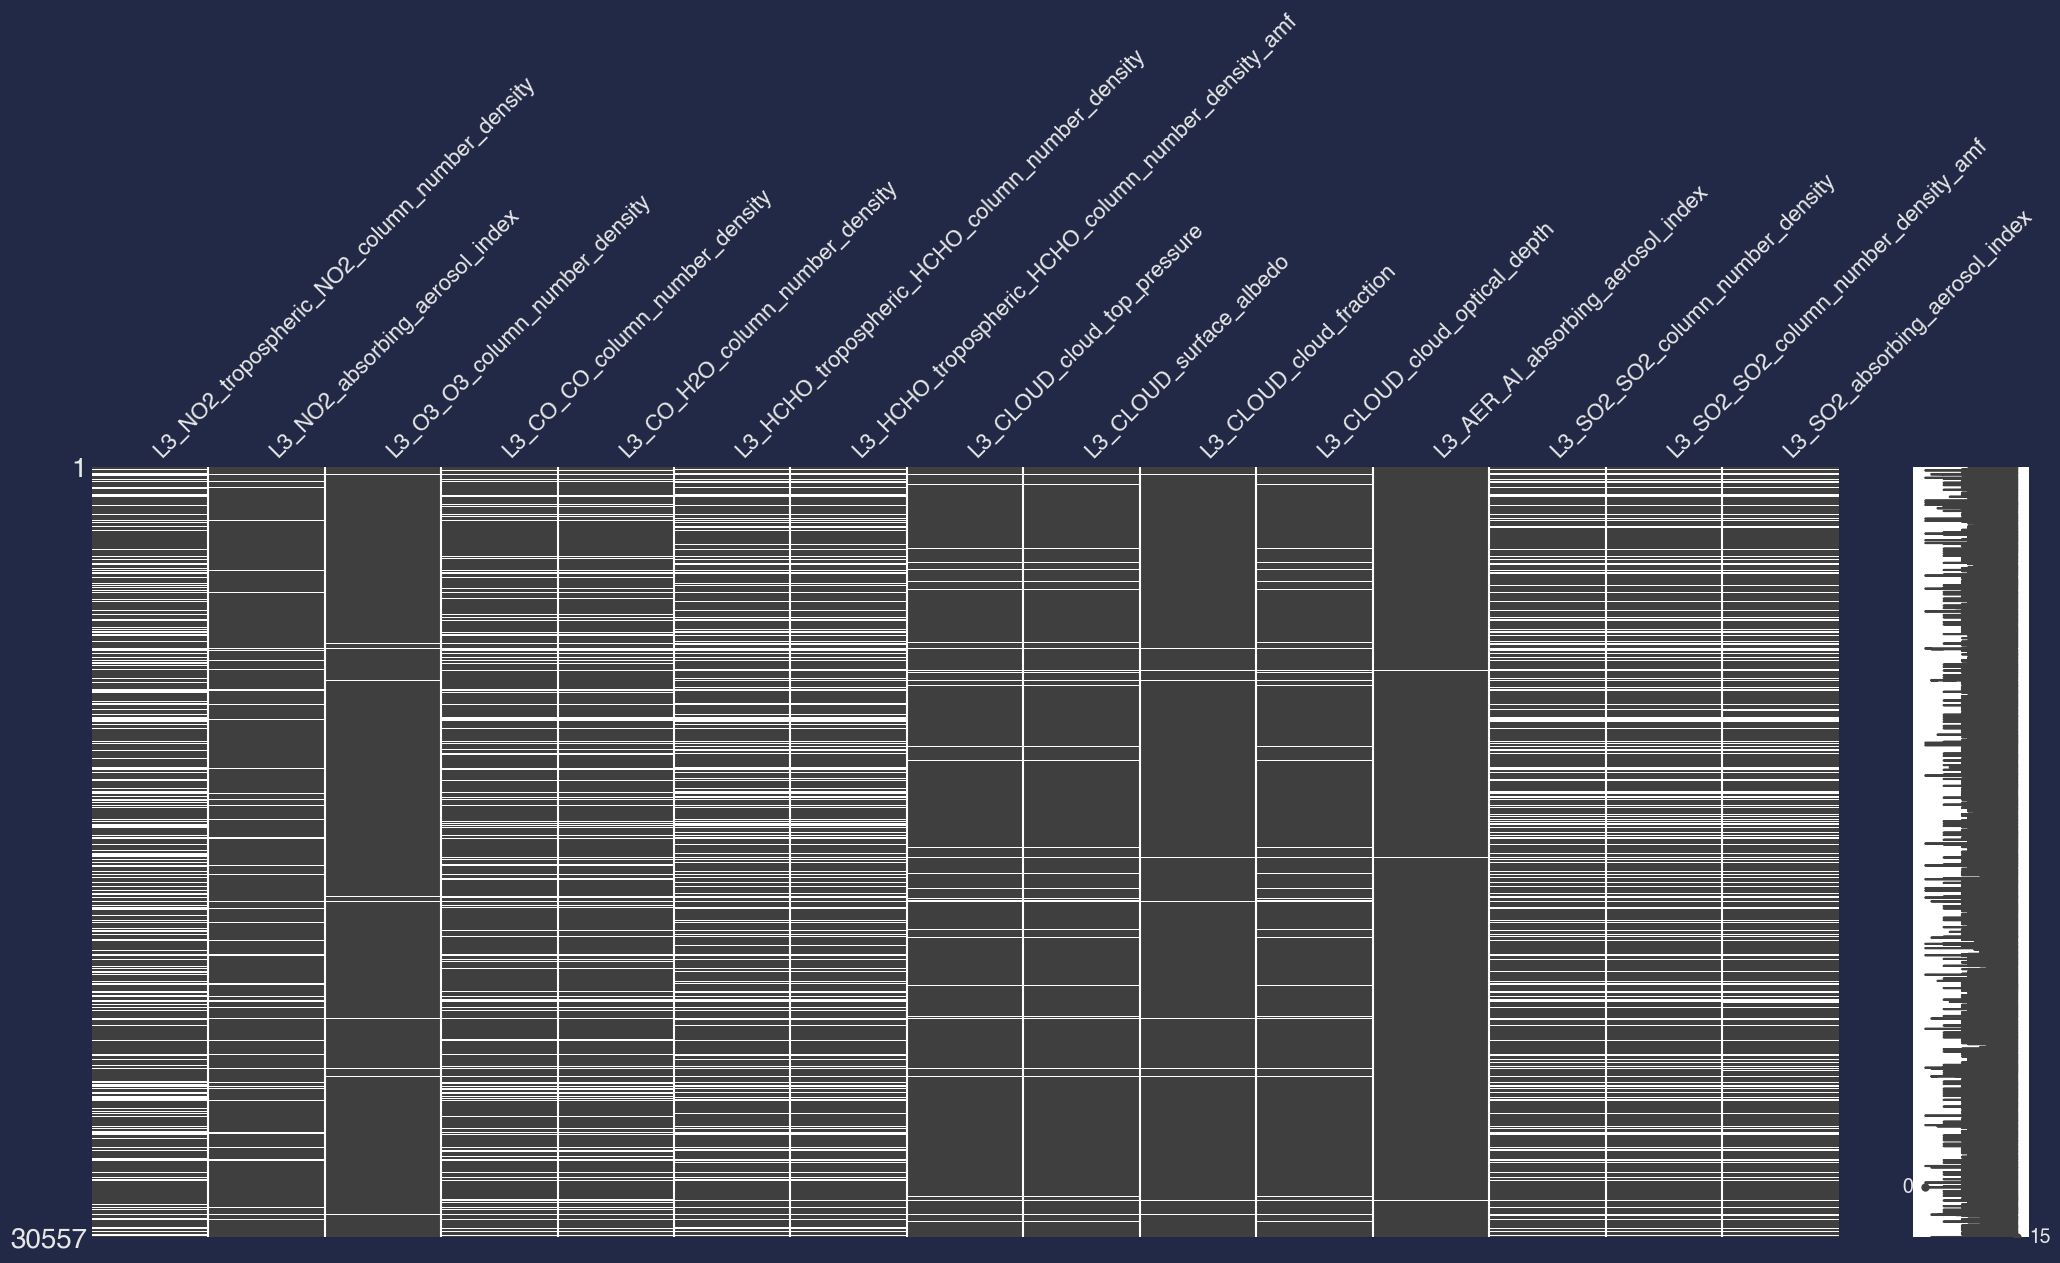

In [33]:
msno.matrix(df[nan_cols]);

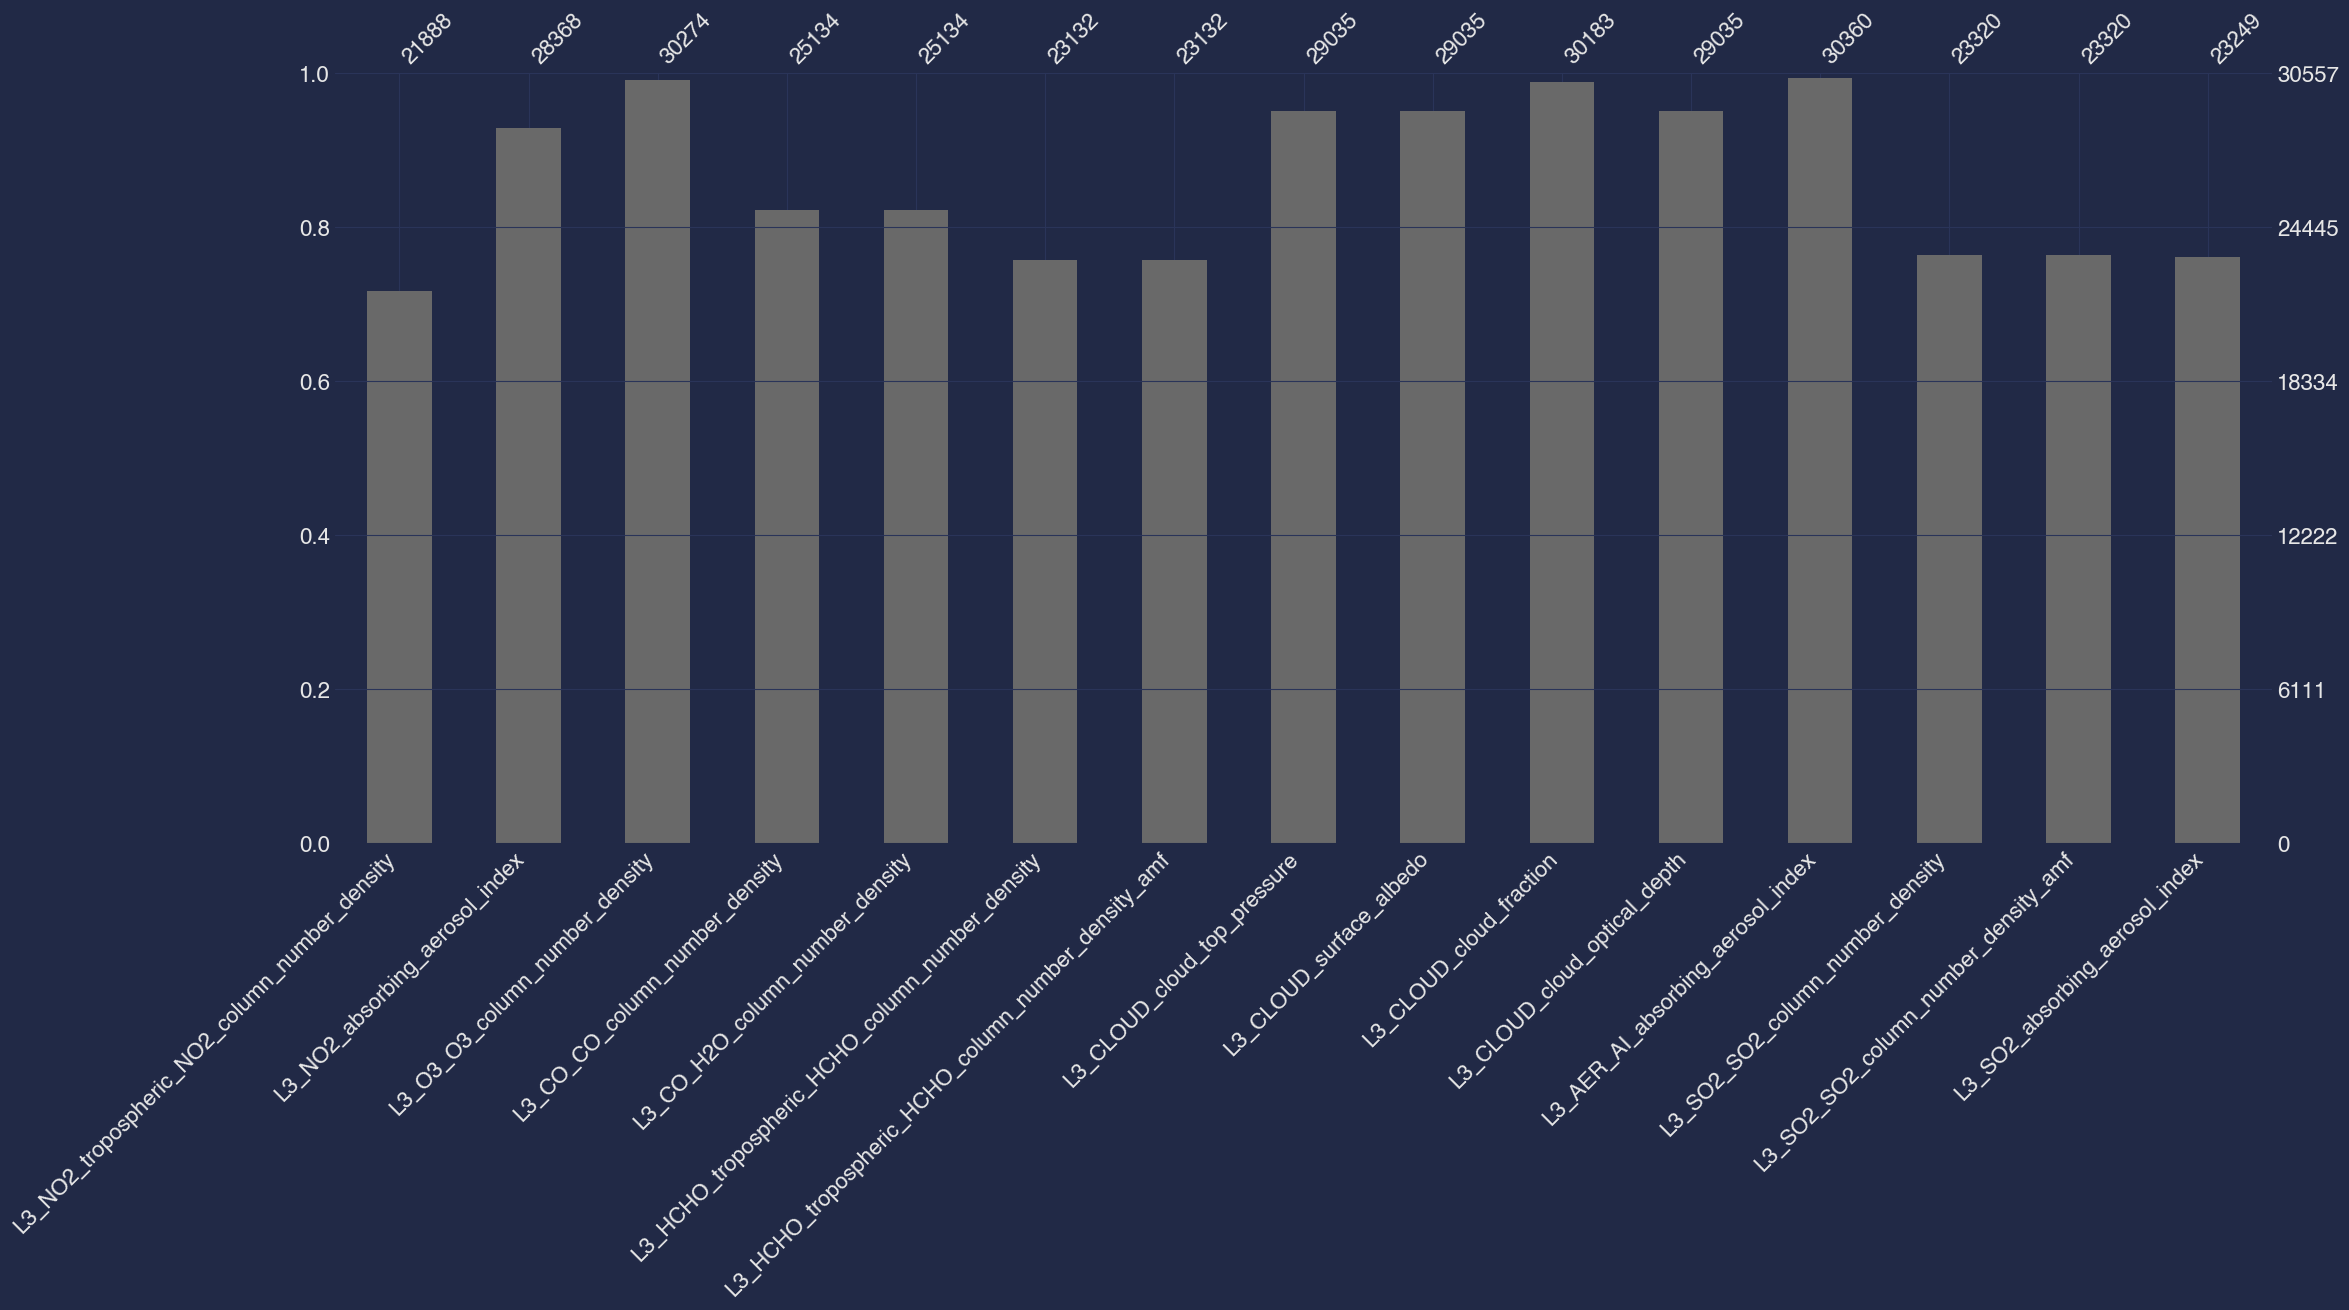

In [34]:
msno.bar(df[nan_cols]);

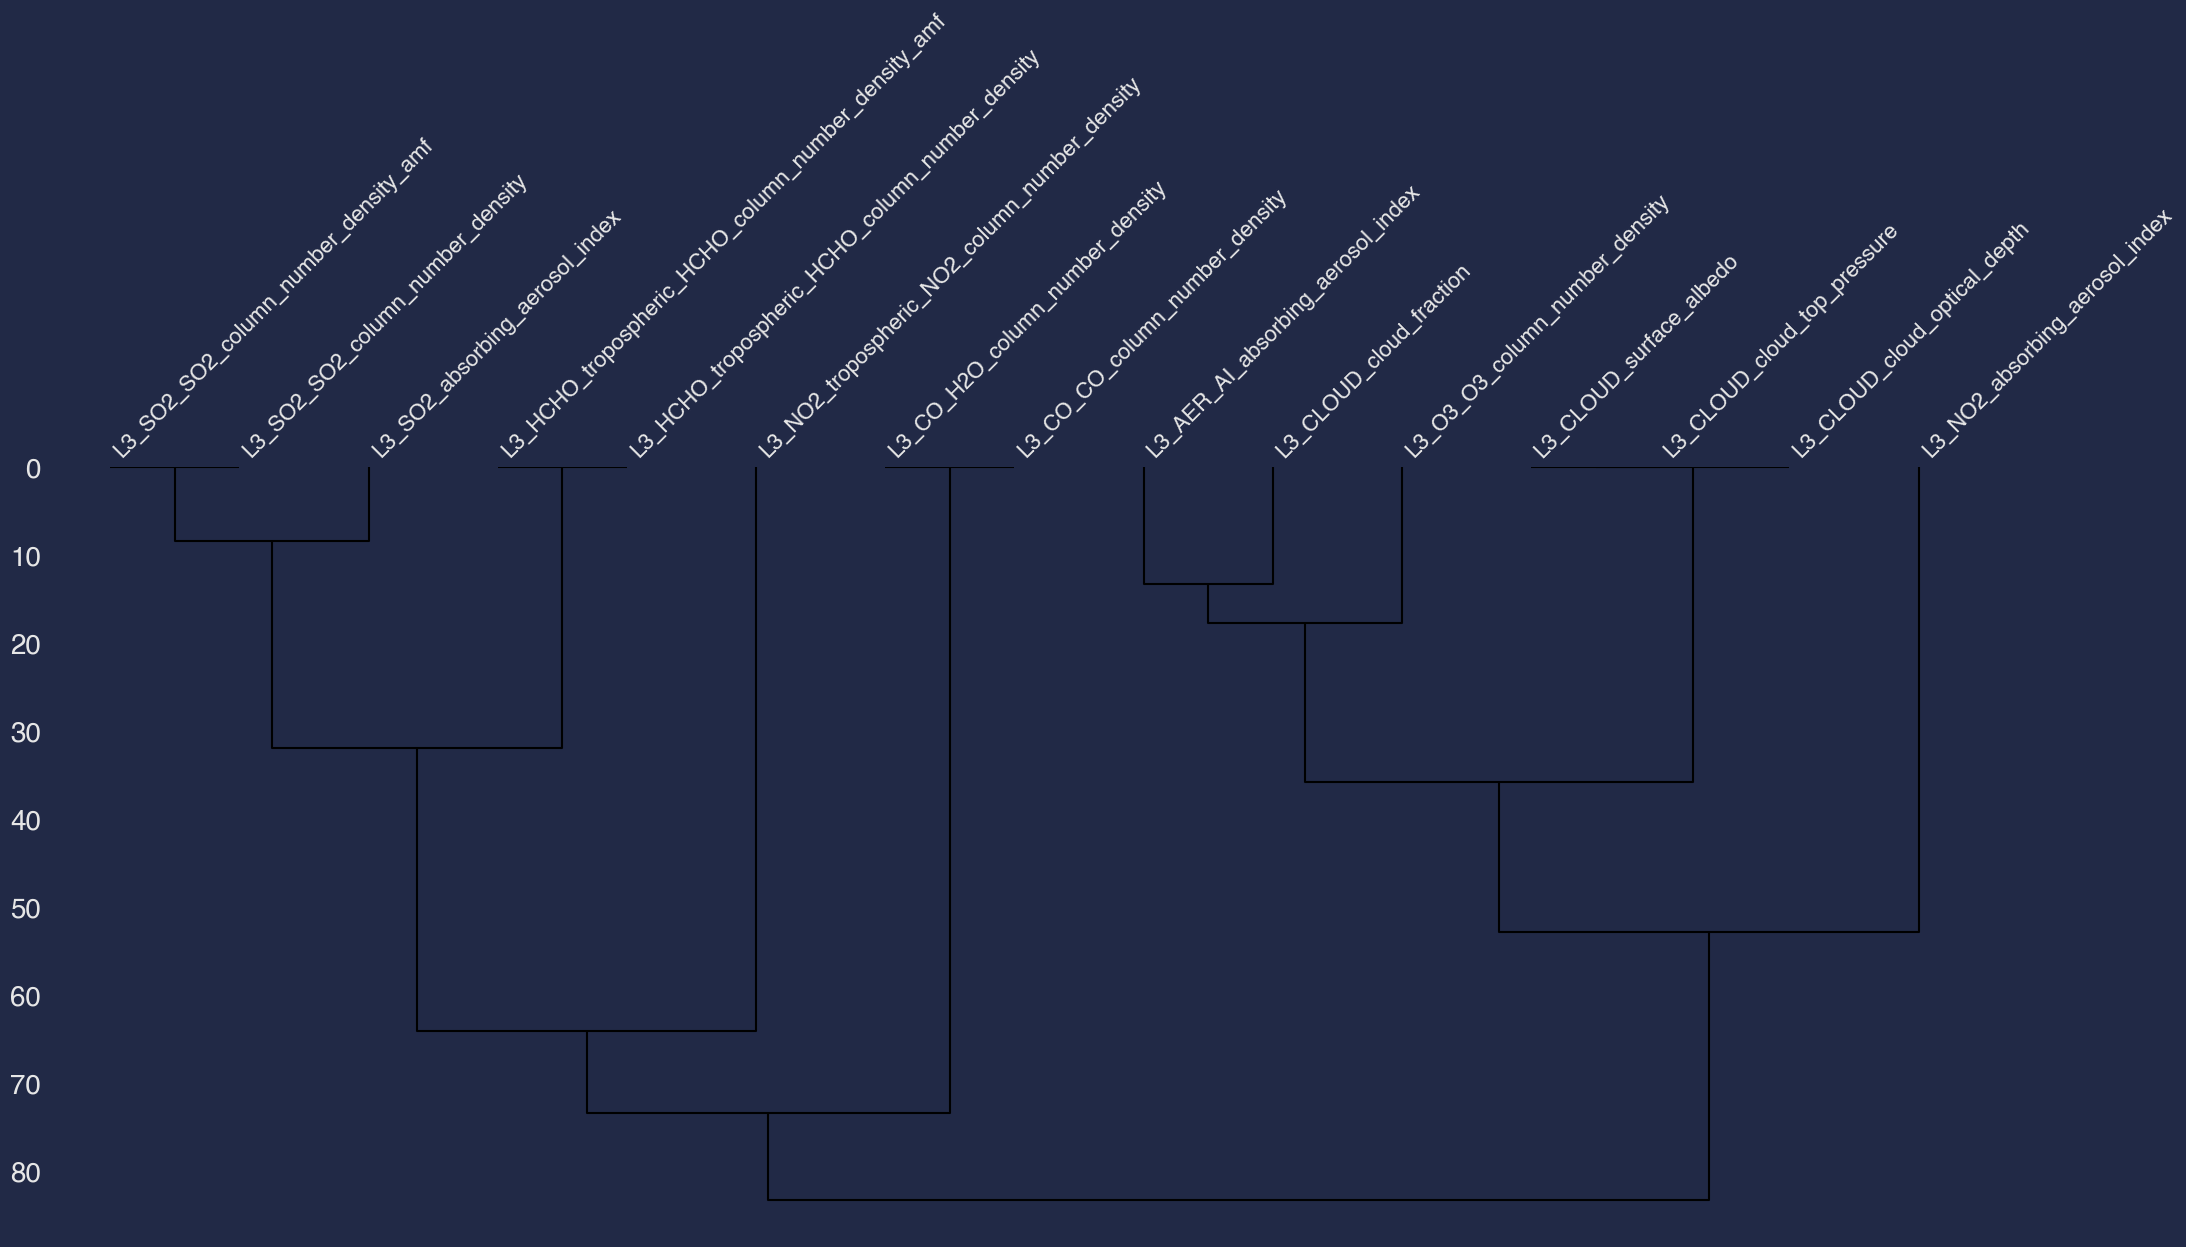

In [35]:
msno.dendrogram(df[nan_cols]);

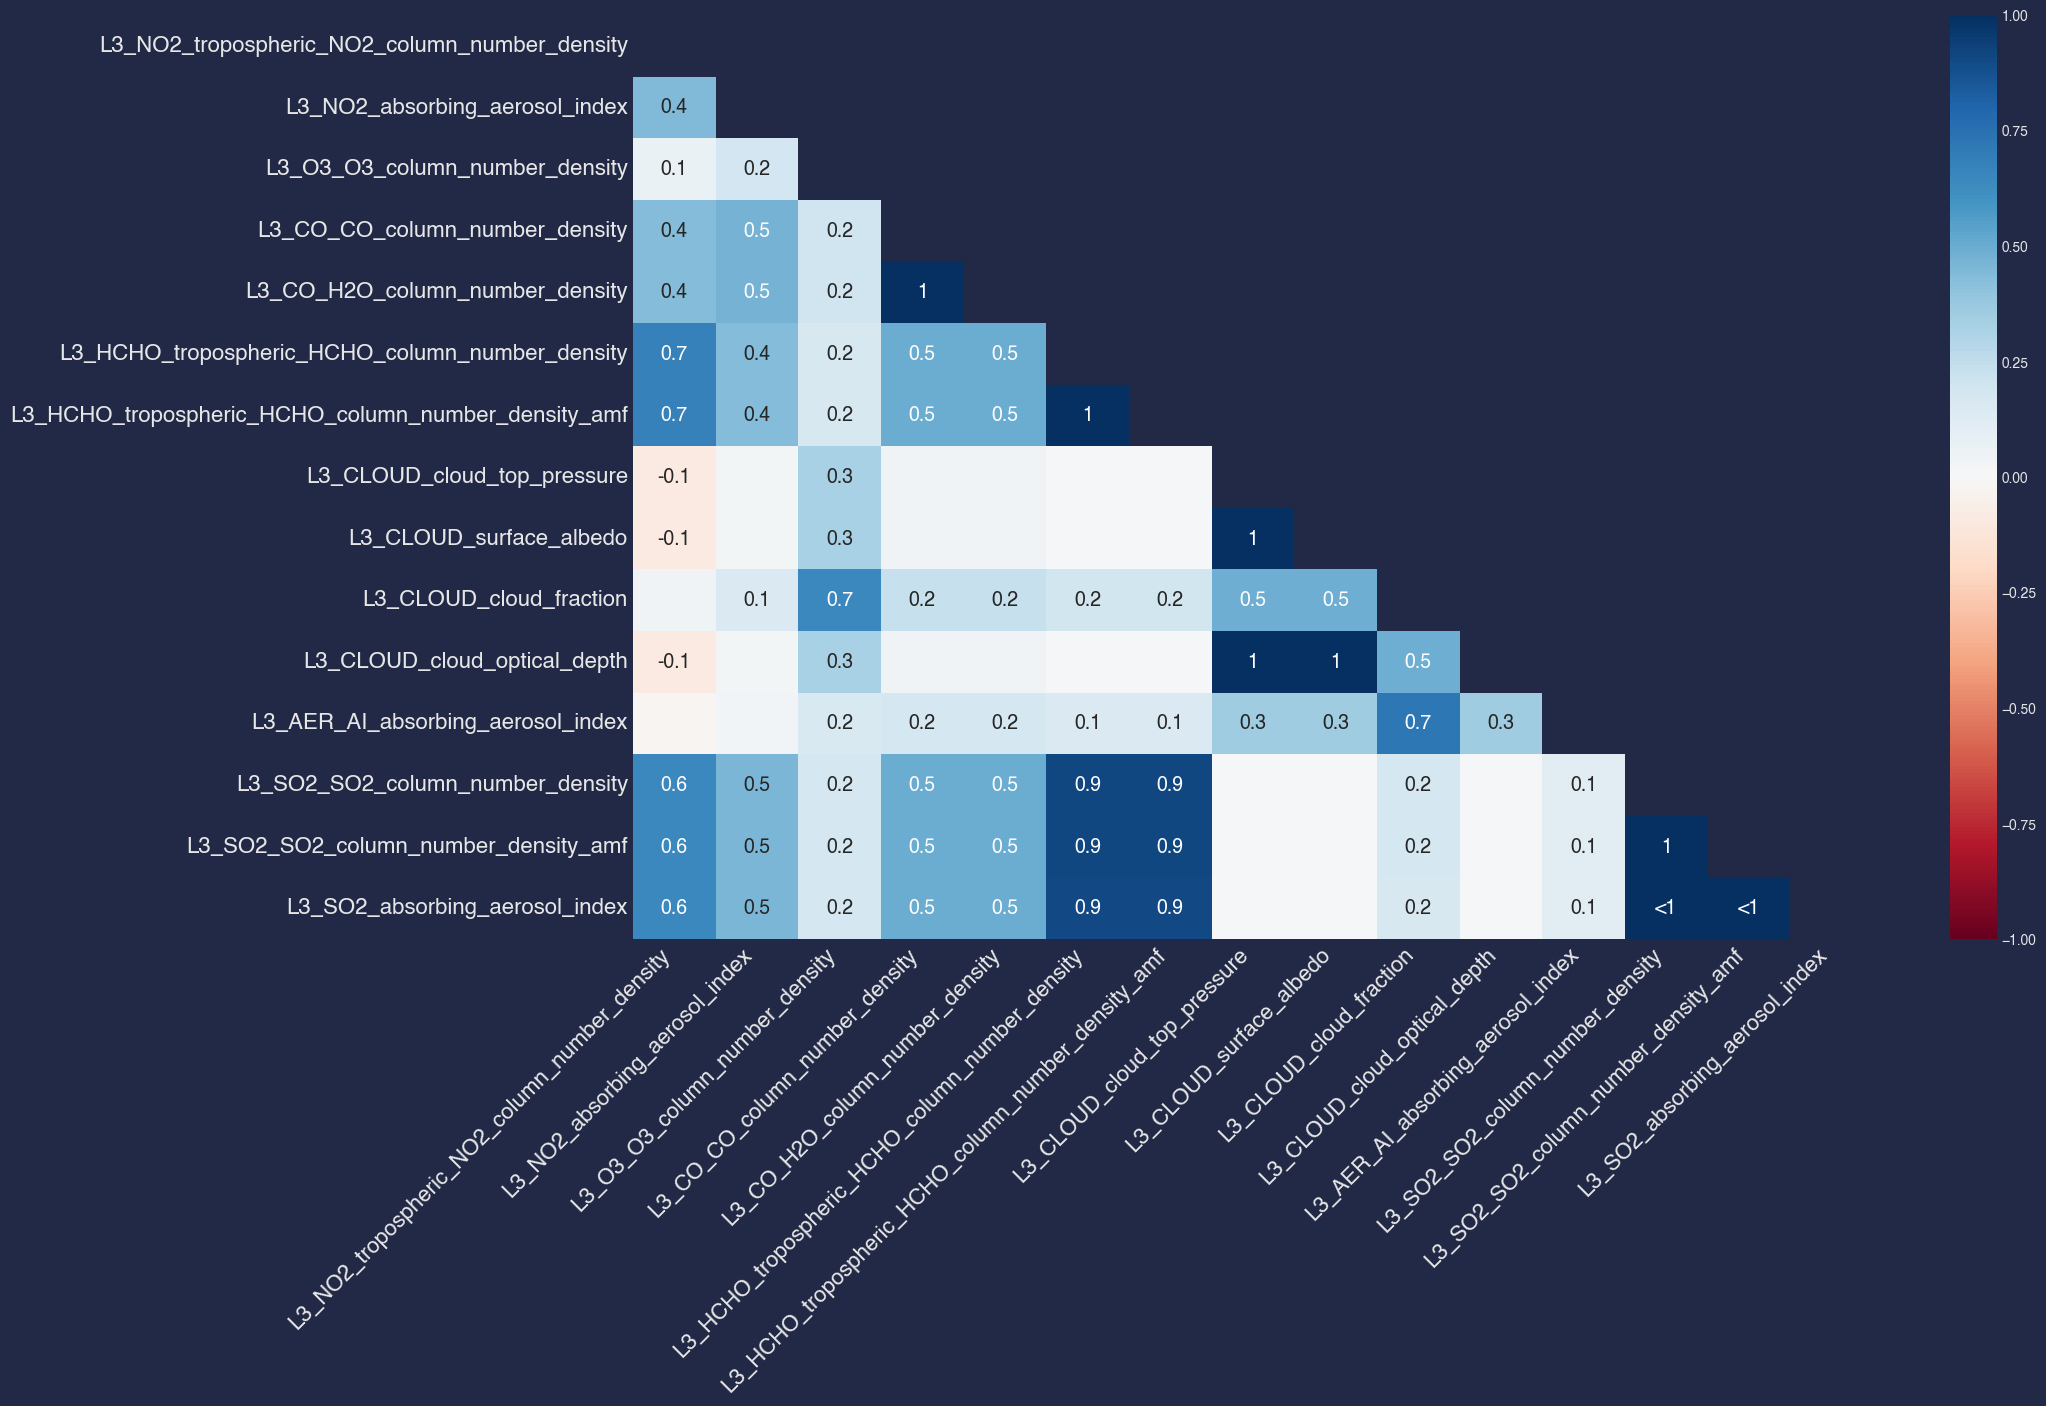

In [36]:
msno.heatmap(df[nan_cols]);

### Suggested Nan Strategy

* Drop 'L3_CH4_*' - too sparse
* See if there is a time auto-correlation or 
* high coefficient of variation, both for the columns in general and for locations



In [37]:
nan_cols = nan_cols.drop([])

In [38]:
##Calculate the coefficient of variation (std dev / mean)

# For all data
df_nan = df[nan_cols]
cof_var_all = df_nan.std() / np.abs(df_nan.mean())

#Sort values and get ready for plotting
cof_var_all = pd.DataFrame(cof_var_all).reset_index()
cof_var_all.columns = ['Variable','COV']
cof_var_all.sort_values('COV', ascending=False, inplace=True)

# For location data
df_nan_place_id = df[list(nan_cols) + ['Place_ID','Date']]
cof_var_place = df_nan_place_id.groupby('Place_ID').std() / df_nan_place_id.groupby('Place_ID').mean() #



Text(0, 0.5, '')

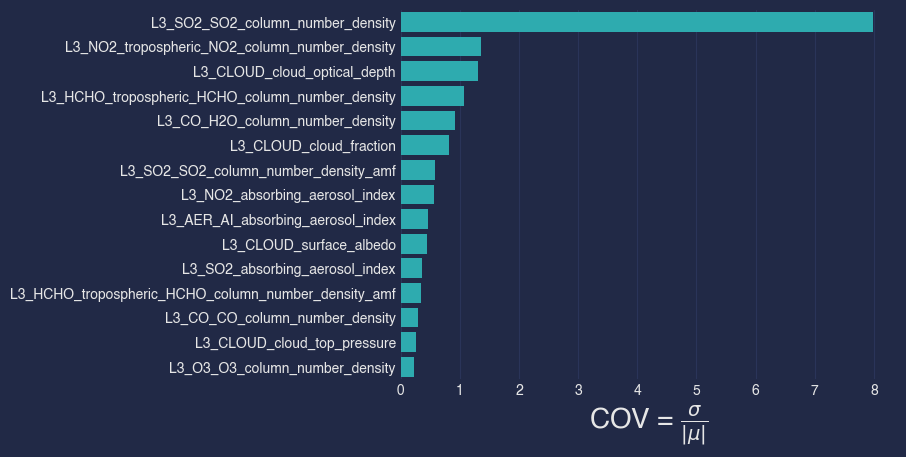

In [39]:
#plot it 
palette = iter(sns.color_palette())

sns.barplot(data=cof_var_all, y='Variable',x='COV', color=next(palette));
plt.xlabel(r'COV = $\frac{\sigma}{|\mu|}$',fontsize=20);
plt.ylabel('')
#plt.xticks(rotation=90);


In [40]:
df_nan_place_id.sort_values(['Place_ID','Date'],inplace=True)

auto_var_place = pd.DataFrame({})
for col in nan_cols:
    auto_var_place[col] = df_nan_place_id.groupby('Place_ID')[col].apply(
        lambda x: x.autocorr())


In [41]:
auto_var_place = auto_var_place.reset_index().melt(id_vars='Place_ID')

In [42]:
auto_var_place.value = np.abs(auto_var_place.value)

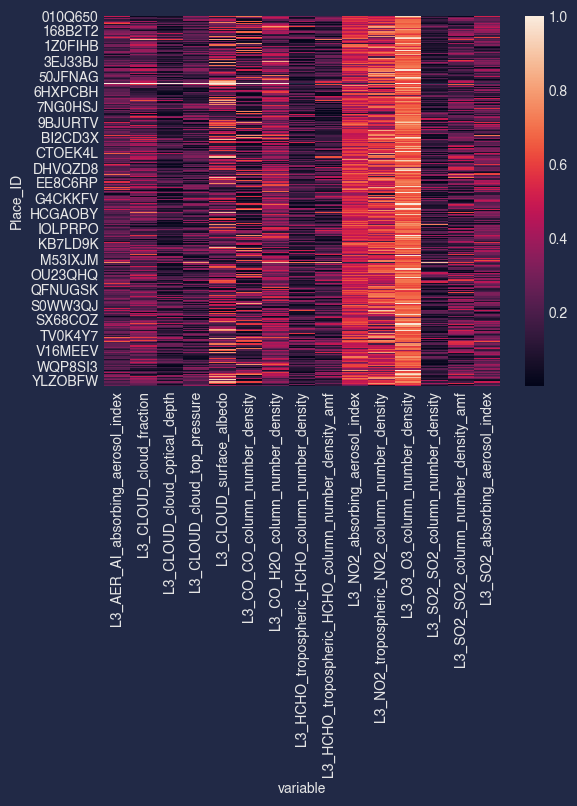

In [43]:
sns.heatmap(data=auto_var_place.pivot('Place_ID','variable','value'));

In [44]:
df_nan_place_id.isna().groupby('Place_ID').sum()

,L3_NO2_tropospheric_NO2_column_number_density,L3_NO2_absorbing_aerosol_index,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_absorbing_aerosol_index,Date
Place_ID,,,,,,,,,,,,,,,,
False,8669,2189,283,5423,5423,7425,7425,1522,1522,374,1522,197,7237,7237,7308,0


<AxesSubplot:xlabel='variable', ylabel='Place_ID'>

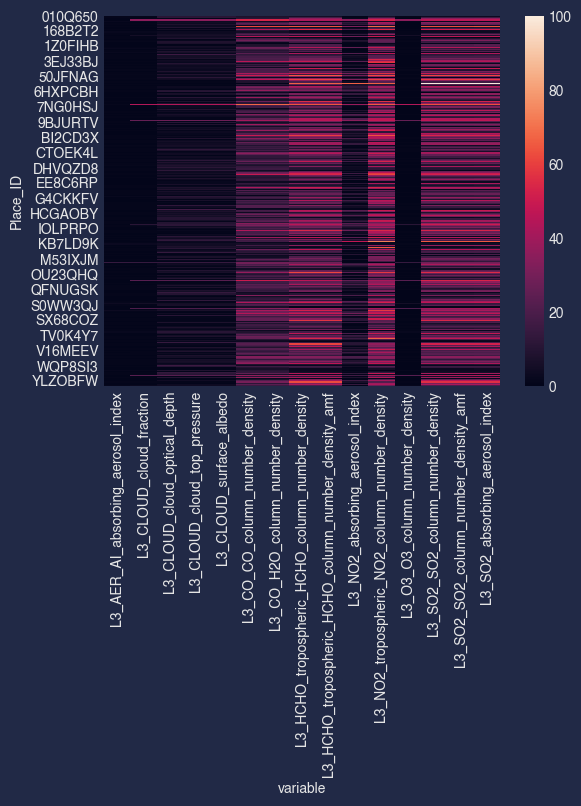

In [101]:
nans_count = df_nan_place_id.sort_values(['Place_ID','Date']).drop("Date",axis=1).melt(id_vars='Place_ID')

n_per_site = nans_count.groupby(['Place_ID','variable']).size()
nans_count = nans_count.groupby(['Place_ID','variable']).apply(lambda x: x.isna().sum()).value

#n_per_site
nans_count = nans_count / n_per_site * 100
nans_count = nans_count.reset_index()
nans_count

nans_count_pivot = nans_count.pivot("Place_ID",'variable',0)
sns.heatmap(nans_count_pivot);

variable
L3_AER_AI_absorbing_aerosol_index                       16.666667
L3_CLOUD_cloud_fraction                                 78.723404
L3_CLOUD_cloud_optical_depth                            78.723404
L3_CLOUD_cloud_top_pressure                             78.723404
L3_CLOUD_surface_albedo                                 78.723404
L3_CO_CO_column_number_density                         211.111111
L3_CO_H2O_column_number_density                        211.111111
L3_HCHO_tropospheric_HCHO_column_number_density        200.000000
L3_HCHO_tropospheric_HCHO_column_number_density_amf    200.000000
L3_NO2_absorbing_aerosol_index                         200.000000
L3_NO2_tropospheric_NO2_column_number_density          263.157895
L3_O3_O3_column_number_density                          78.723404
L3_SO2_SO2_column_number_density                              inf
L3_SO2_SO2_column_number_density_amf                          inf
L3_SO2_absorbing_aerosol_index                                inf
d

In [47]:
for col in nan_cols[0:1]:
    print(col)

L3_NO2_tropospheric_NO2_column_number_density
